In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
% cd /content/drive/'My Drive'/Internship2
!ls


/content/drive/My Drive/Internship2
 classes		    img2.zip  'Loading in our own data.ipynb'
 CNN.ipynb		    img.rar   'Random Forest.ipynb'
 god-classification.ipynb   img.zip


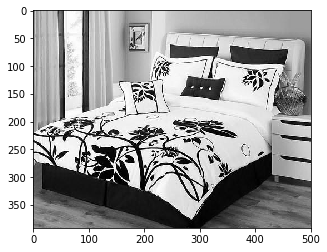

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "classes/val"

CATEGORIES = ["bed", "chair","sofa","table"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

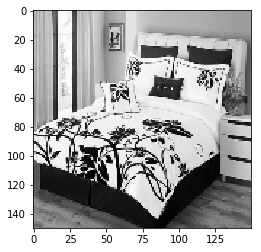

In [11]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 23/23 [00:15<00:00,  1.03it/s]

92


In [0]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

3
3
3
3
0
3
3
0
3
1


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[201]
   [176]
   [148]
   ...
   [ 37]
   [ 19]
   [  7]]

  [[190]
   [174]
   [148]
   ...
   [ 37]
   [ 16]
   [  6]]

  [[190]
   [176]
   [146]
   ...
   [ 37]
   [ 10]
   [  5]]

  ...

  [[171]
   [170]
   [174]
   ...
   [155]
   [159]
   [155]]

  [[172]
   [172]
   [176]
   ...
   [153]
   [154]
   [153]]

  [[170]
   [173]
   [176]
   ...
   [152]
   [150]
   [152]]]]


In [0]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()